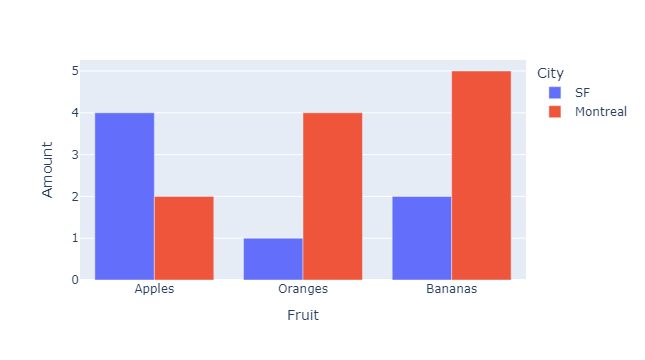

In [1]:
import plotly.express as px
import pandas as pd

# 創建一個簡單的資料集
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

# 使用 Plotly 繪製條形圖
fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

# 顯示圖表
fig.show()

In [6]:
df_fin = pd.read_csv('financial_data.csv')
df_fin

,公司代號,公司名稱,營業收入(百萬元),毛利率(%)(營業毛利)/(營業收入),營業利益率(%)(營業利益)/(營業收入),稅前純益率(%)(稅前純益)/(營業收入),稅後純益率(%)(稅後純益)/(營業收入)
0,1101,NaN,25544.60,15.22,4.70,13.12,8.77
1,1102,NaN,16499.75,10.65,6.20,22.01,17.06
2,1103,NaN,699.14,14.91,-2.80,-4.27,-6.23
3,1104,NaN,1908.57,20.09,12.90,18.40,13.34
4,1108,NaN,1192.97,18.88,13.54,12.85,10.24
...,...,...,...,...,...,...,...
1039,公司代號,NaN,NaN,NaN,NaN,NaN,NaN
1040,9945,NaN,7000.52,25.53,18.10,137.06,118.71
1041,9946,NaN,301.27,29.02,14.77,13.89,13.39
1042,9955,NaN,272.89,-0.81,-12.33,-11.57,-11.57


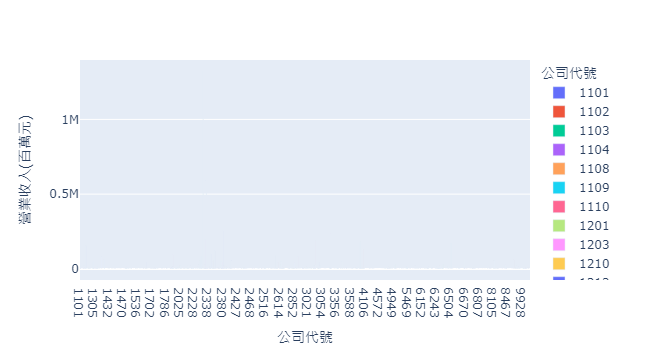

In [8]:
# 使用 Plotly 繪製條形圖
fig = px.bar(df_fin[:10], x="公司代號", y="營業收入(百萬元)", color="公司代號", barmode="group")

# 顯示圖表
fig.show()

In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# 創建 Dash 應用
app = dash.Dash(__name__)

# 讀取數據
df = pd.read_csv('taiwan_stock_index_10y.csv')

# 確保日期列被識別為日期類型
df['Date'] = pd.to_datetime(df['Date'])

# 定義應用的佈局
app.layout = html.Div([
    html.H1("Taiwan Stock Index 10 Years"),
    dcc.Graph(id='line-chart'),
    dcc.RangeSlider(
        id='date-range-slider',
        min=0,
        max=len(df)-1,
        value=[0, len(df)-1],
        marks={i: date.strftime('%Y-%m-%d') for i, date in enumerate(df['Date'].iloc[::len(df)//10])},
        step=1
    )
])

# 定義回調函數
@app.callback(
    Output('line-chart', 'figure'),
    [Input('date-range-slider', 'value')]
)
def update_line_chart(date_range):
    filtered_df = df.iloc[date_range[0]:date_range[1]+1]
    fig = px.line(filtered_df, x='Date', y='Close', title='Taiwan Stock Index Over Time')
    return fig

# 運行應用
app.run_server(mode='inline', port=8051, dev_tools_ui=True, dev_tools_props_check=True)
